In [1]:
import jsonlines
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

##  Извлекаем собранную информацию по репозиториям

In [2]:
collected_info = []
with jsonlines.open('collected_info.jsonl') as reader:
    for obj in reader:
        collected_info.append(obj)


In [3]:
df = pd.DataFrame.from_dict(collected_info)
df.head()

,rep_url,rep_size_on_disk,rep_total_files,rep_total_py_files,com_msg,com_msg_lang,com_num_files,com_hash,com_author,com_committer,...,com_num_py_files,com_py2add_lines,com_py2del_lines,com_py2paths,com_py2nloc,com_py2lines_after,com_py2lines_before,com_py2imports_before,com_py2imports_after,com_py2ch_type
0,https://github.com/knadh/ml2en,143694,121,4,"Fix README description, examples, and version",True,2,cf0c1b432def6b35af5115d34a85c0af6fd38cbe,Kailash Nadh,Kailash Nadh,...,1,{'1_setup.py': 1},{'1_setup.py': 1},"{'1_setup.py': ['setup.py', 'setup.py']}",{'1_setup.py': 26},{'1_setup.py': 44},{'1_setup.py': 46},{'1_setup.py': ['from ml2en import ml2en ']},{'1_setup.py': ['from ml2en import ml2en ']},{'1_setup.py': 'MODIFY'}
1,https://github.com/knadh/ml2en,143694,121,4,Adjust ml2en python scripts to pep8 indentatio...,False,2,1130192e3a60aafe50e069f353bb91cbccbc5913,Shreehari,Shreehari,...,2,"{'0_ml2en.py': 204, '1_ml2en.py': 205}","{'0_ml2en.py': 121, '1_ml2en.py': 122}","{'0_ml2en.py': ['ml2en.py', 'ml2en.py'], '1_ml...","{'0_ml2en.py': 170, '1_ml2en.py': 172}","{'0_ml2en.py': 217, '1_ml2en.py': 217}","{'0_ml2en.py': 134, '1_ml2en.py': 134}","{'0_ml2en.py': ['import re'], '1_ml2en.py': ['...","{'0_ml2en.py': ['import re'], '1_ml2en.py': ['...","{'0_ml2en.py': 'MODIFY', '1_ml2en.py': 'MODIFY'}"
2,https://github.com/knadh/ml2en,143694,121,4,Fixed comment typo,False,3,20172811d7ba6113115fdf464de56aab9aa82a6a,Kailash Nadh,Kailash Nadh,...,1,{'2_ml2en.py': 1},{'2_ml2en.py': 1},"{'2_ml2en.py': ['ml2en.py', 'ml2en.py']}",{'2_ml2en.py': 87},{'2_ml2en.py': 178},{'2_ml2en.py': 178},{'2_ml2en.py': []},{'2_ml2en.py': []},{'2_ml2en.py': 'MODIFY'}
3,https://github.com/knadh/ml2en,143694,121,4,Made transliterate() static,True,1,304ad8a713d6f13215082e4ae3fdb169a160a0e7,Kailash Nadh,Kailash Nadh,...,0,{},{},{},{},{},{},{},{},{}
4,https://github.com/knadh/ml2en,143694,121,4,Added new rule for ukaram+chandrakkala,True,4,a0762eff9e576707ca890e11b142d9daa913b192,Kailash Nadh,Kailash Nadh,...,1,{'2_ml2en.py': 1},{'2_ml2en.py': 1},"{'2_ml2en.py': ['ml2en.py', 'ml2en.py']}",{'2_ml2en.py': 87},{'2_ml2en.py': 178},{'2_ml2en.py': 178},{'2_ml2en.py': []},{'2_ml2en.py': []},{'2_ml2en.py': 'MODIFY'}


In [4]:
df_grouped = df.groupby(by='rep_url')[['rep_size_on_disk', 'rep_total_files', 'rep_total_py_files']].mean()

In [5]:
df_grouped = df_grouped.reset_index()

In [7]:
df_grouped = df_grouped.loc[df_grouped['rep_total_files'] < 500]

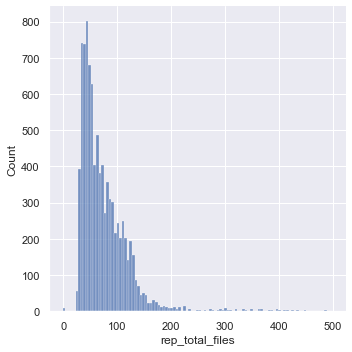

In [8]:
sns.displot(df_grouped, x='rep_total_files')

In [10]:
df_grouped['py_perc'] = df_grouped['rep_total_py_files'] / df_grouped['rep_total_files']

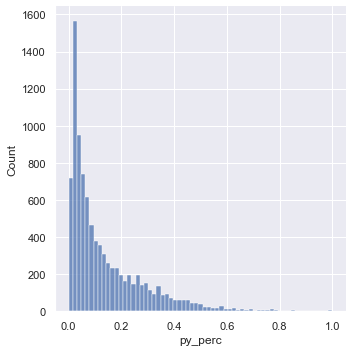

In [11]:
sns.displot(df_grouped, x='py_perc')

## Основная информация

In [13]:
print('Num of downloaded revisions:', df.shape[0])
print('Num of repos:', len(df.rep_url.unique()))

Num of downloaded revisions: 145392
Num of repos: 9409


In [15]:
print('Mean modified files per commit:', df.com_num_files.mean(), '+-', df.com_num_files.std())
print('Mean modified files per commit (2):', df.com_len_mod_files.mean(), '+-', df.com_len_mod_files.std())

Mean modified files per commit: 9.435367833168263 +- 223.3064453438519
Mean modified files per commit (2): 9.435897435897436 +- 223.30647950052884


In [16]:
print('Mean PY files per commit:', df.com_num_py_files.mean(), '+-', df.com_num_py_files.std())

Mean PY files per commit: 3.4638425773082426 +- 60.46061749201764


In [18]:
print('Mean modified lines per commit', df.com_lines.mean(), '+-', df.com_lines.std())
print('Mean deletions lines per commit', df.com_deletions.mean(), '+-', df.com_deletions.std())
print('Mean insertions lines per commit', df.com_insertions.mean(), '+-', df.com_insertions.std())

Mean modified lines per commit 4532.052334378783 +- 201968.29169298132
Mean deletions lines per commit 714.5677891493342 +- 40688.65590009832
Mean insertions lines per commit 3817.4845452294485 +- 196171.00107930604


In [20]:
print('Only PY file per100:', df[(df.com_num_py_files==1) & (df.com_num_files==1)].shape[0] / df.shape[0])

Only PY file per100: 0.4751430615164521


## Ревизии с единственным измененным файлом

In [25]:
df_good = df[(df.com_num_py_files==1) & (df.com_num_files==1) & (df.com_msg.str.len()>0) & (df.rep_lang==True)]
df_good = df_good[(df_good.com_lines<1000)]

In [26]:
print('Mean modified lines per commit', df_good.com_lines.mean(), '+-', df_good.com_lines.std())
print('Mean deletions lines per commit', df_good.com_deletions.mean(), '+-', df_good.com_deletions.std())
print('Mean insertions lines per commit', df_good.com_insertions.mean(), '+-', df_good.com_insertions.std())

Mean modified lines per commit 30.653203841185352 +- 66.9369002696711
Mean deletions lines per commit 8.755957105725981 +- 29.341417959900184
Mean insertions lines per commit 21.89724673545937 +- 52.55358838099476


In [29]:
df_good = df[(df.com_num_py_files==1) & (df.com_num_files==1) & (df.com_msg.str.len()>0) & (df.rep_lang==True)]
df_good = df_good[(df_good.com_lines<50)]

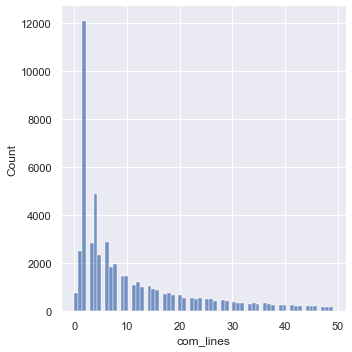

In [30]:
sns.displot(df_good, x='com_lines')

In [31]:
df_good.shape

(54086, 33)

## Смотрим на импортируемые библиотеки

In [53]:
def extract_libname(import_line): # Not works with relative pathes
    imp_ = import_line[:]
    import_line = import_line.strip()
    if import_line[:6] == 'import':
        import_line = import_line[7:].strip()
        as_idx = import_line.find(' as ')
        if as_idx >= 0:
            import_line = import_line[:as_idx].strip()
    else:
        import_line = import_line[4:].strip()
        import_line = import_line.split(' import ')[0].strip()
    if import_line.split('.')[0].strip() == '':
        # print(imp_)
        pass
    return import_line.split('.')[0].strip()

In [54]:
a = ['import re',
 'import numpy as np',
 'import os',
 'import sys',
 'import pandas as pd',
 'from tqdm import tqdm',
 'from math import log',
 'from sklearn.metrics import r2_score']

[extract_libname(b) for b in a]

['re', 'numpy', 'os', 'sys', 'pandas', 'tqdm', 'math', 'sklearn']

In [55]:
from collections import Counter

libs_cnt = Counter()
for row_idx, row in df_good.iterrows():
    for k, v in row['com_py2imports_before'].items():
        for imp_line in v:
            libs_cnt[extract_libname(imp_line)] += 1

In [56]:
libs_cnt.most_common(30)

[('django', 18254),
 ('os', 15713),
 ('sys', 12371),
 ('time', 8161),
 ('re', 7651),
 ('datetime', 5775),
 ('logging', 5016),
 ('json', 3633),
 ('urllib', 3471),
 ('subprocess', 3274),
 ('numpy', 3059),
 ('google', 2782),
 ('', 2761),
 ('setuptools', 2602),
 ('urllib2', 2570),
 ('twisted', 2556),
 ('random', 2509),
 ('optparse', 2436),
 ('__future__', 2163),
 ('socket', 2153),
 ('collections', 2119),
 ('threading', 1925),
 ('argparse', 1829),
 ('math', 1686),
 ('hashlib', 1679),
 ('urlparse', 1610),
 ('xml', 1552),
 ('struct', 1446),
 ('shutil', 1436),
 ('tornado', 1397)]